# Instructions

We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
sys.path.append("..")
import time
print(sys.version)

3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]


Let's import from neural_de the brightness method

In [5]:
from neural_de.transformations.brightness_enhancer import BrightnessEnhancer
import tensorflow as tf

We load an example image

Num GPUs Available:  0


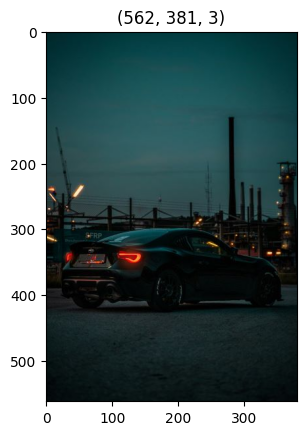

In [6]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import os
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
start=time.time()
input_path = Path('../examples/images/test_brightness_car.jpg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image)

# Enhancing an image

We create an instance of BrightnessEnhancer :

In [7]:

image_enhancer = BrightnessEnhancer()

[03-19 16:52:47] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\utils\twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


We apply the transform method to any number of images. 
For example, one image and then two images in a batch.

In [8]:
enhanced_images = image_enhancer.transform([image])


[03-19 16:52:48] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\transformations\brightness_enhancer.py:56} INFO - Image normalized as between [0;1]


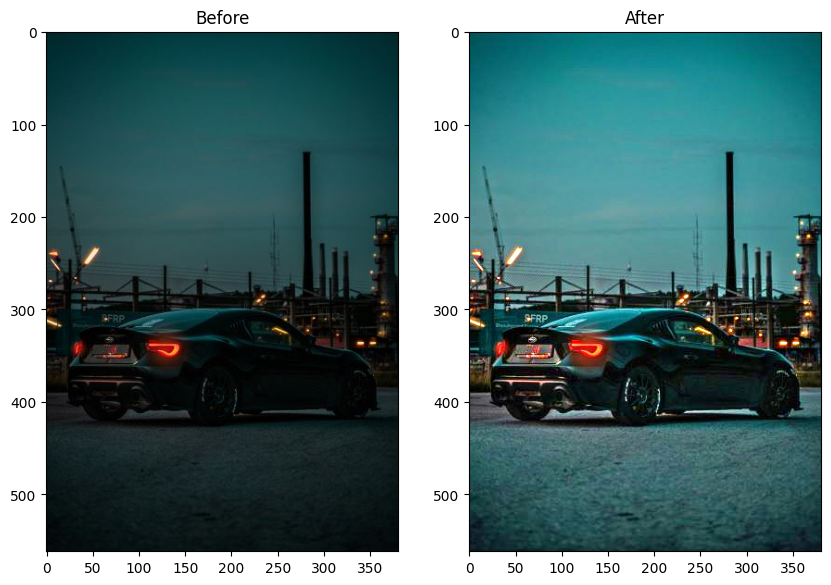

In [9]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Before")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("After")
plt.imshow(enhanced_images[0])
plt.show()

Now an example with two images in a batch.

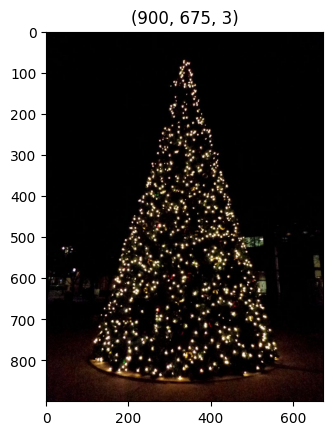

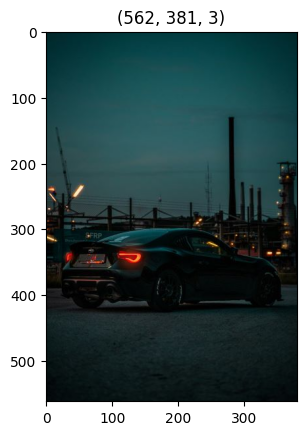

In [10]:
ROOT_DIR = "../examples/images"
image_path_list = []
image_path_list.append(ROOT_DIR +  "/test_brightness_xmass_tree.jpg")
image_path_list.append(ROOT_DIR +  "/test_brightness_car.jpg")
image_list = []
for image_path_str in image_path_list:        
    input_path = Path(image_path_str)
    image = cv2.imread(str(input_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_list.append(image)
    plt.figure()
    plt.title(image.shape)
    plt.imshow(image)

In [11]:
enhanced_images = image_enhancer.transform(image_list)

[03-19 16:52:51] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\transformations\brightness_enhancer.py:56} INFO - Image normalized as between [0;1]
[03-19 16:52:52] {C:\SAUVEGARDES_FIN_CONFIANCE\FONDATION\Support_composants\NeuralDE\examples\..\neural_de\transformations\brightness_enhancer.py:56} INFO - Image normalized as between [0;1]


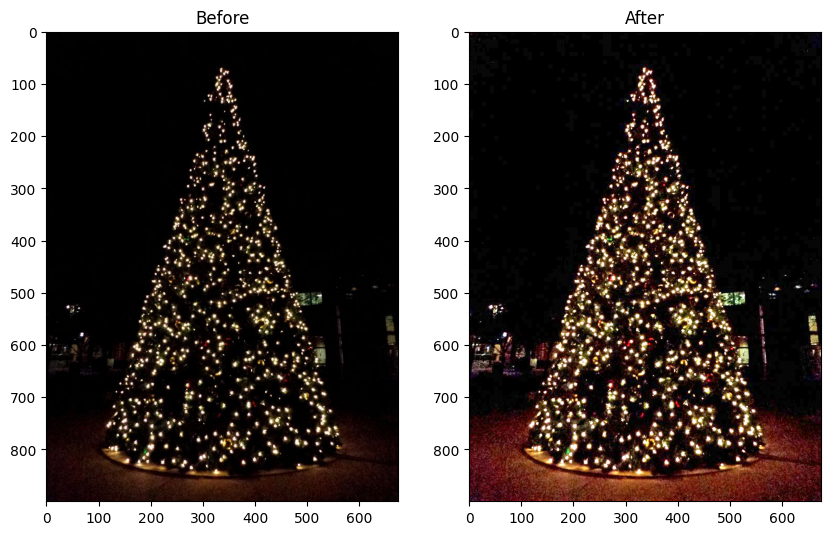

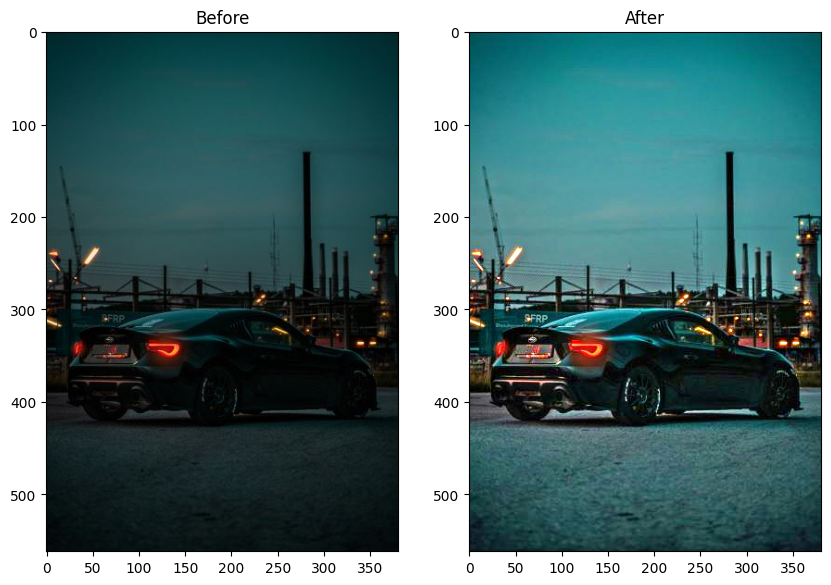

In [12]:
for image_index_ in range(len(image_list)):
    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    plt.title("Before")
    plt.imshow(image_list[image_index_])
    plt.subplot(1,2,2)
    plt.title("After")
    plt.imshow(enhanced_images[image_index_])
    plt.show()

In [13]:
end=time.time()
print("final duration : ",end-start)

final duration :  8.578594207763672
